In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('pivoted.csv')
british = pd.read_csv('british.csv').dropna()
continent = pd.read_csv('continent.csv')
education = pd.read_csv('education.csv')

In [3]:
education = education.replace('..',np.nan)
education.head()

,Time,Time Code,Country Name,Country Code,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]",Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]","All education staff compensation, secondary (% of total expenditure in secondary public institutions) [SE.XPD.MSEC.ZS]","All education staff compensation, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.MTER.ZS]","All education staff compensation, total (% of total expenditure in public institutions) [SE.XPD.MTOT.ZS]","Compulsory education, duration (years) [SE.COM.DURS]","Current education expenditure, primary (% of total expenditure in primary public institutions) [SE.XPD.CPRM.ZS]","Current education expenditure, secondary (% of total expenditure in secondary public institutions) [SE.XPD.CSEC.ZS]","Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.CTER.ZS]","Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.BA.FE.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.BA.MA.ZS]","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.BA.ZS]","Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.LO.FE.ZS]","Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.LO.MA.ZS]","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.LO.ZS]","Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.PO.FE.ZS]","Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.PO.MA.ZS]","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.PO.ZS]","Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative) [SE.PRM.CUAT.FE.ZS]","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative) [SE.PRM.CUAT.MA.ZS]","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative) [SE.PRM.CUAT.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative) [SE.TER.CUAT.ST.FE.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative) [SE.TER.CUAT.ST.MA.ZS]","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative) [SE.TER.CUAT.ST.ZS]","Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative) [SE.SEC.CUAT.UP.FE.ZS]","Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative) [SE.SEC.CUAT.UP.MA.ZS]","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative) [SE.SEC.CUAT.UP.ZS]","Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative) [SE.TER.CUAT.MS.FE.ZS]","Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative) [SE.TER.CUAT.MS.MA.ZS]","Educational attainment, at least Master's or equivalent, population 25

In [4]:
df = pd.merge(df, education, on=['Time Code','Country Code'])

In [5]:
df = df.replace('NaN',np.nan)
df.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",Income share held by lowest 20% [SI.DST.FRST.20],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Contraceptive prevalence, any methods (% of women ages 15-49) [SP.DYN.CONU.ZS]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Prevalence of underweight, weight for age (% of children under 5) [SH.STA.MALN.ZS]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]","Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]","School enrollment, secondary (% gross) [SE.SEC.ENRR]","School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]","Prevalence of HIV, total (% of population ages 15-49) [SH.DYN.AIDS.ZS]",Forest area (sq. km) [AG.LND.FRST.K2],"Water productivity, total (constant 2010 US$ GDP per cubic meter of total freshwater withdrawal) [ER.GDP.FWTL.M3.KD]",Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],"Revenue, excluding grants (% of GDP) [GC.REV.XGRT.GD.ZS]",Start-up procedures to register a business (number) [IC.REG.PROC],Market capitalization of listed domestic companies (% of GDP) [CM.MKT.LCAP.GD.ZS],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]",Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],Net migration [SM.POP.NETM],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Net ODA received per capita (current US$) [DT.ODA.ODAT.PC.ZS],GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,"Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]",Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"All education staff compensation, primary (% of total expenditure in primary public institutions) [SE.XPD.MPRM.ZS]","All education staff compensation, secondary (% of total expenditure in secondary public institutions) [SE.XPD.MSEC.ZS]","A

In [6]:
from collections import OrderedDict
dd = OrderedDict(sorted(dict(df.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

OrderedDict([('Time_x', 15), ('Time_y', 15), ('Time Code', 25), ('Country Name_x', 25), ('Country Code', 25), ('Country Name_y', 25), ('Population, total [SP.POP.TOTL]', 31), ('Population growth (annual %) [SP.POP.GROW]', 32), ('Surface area (sq. km) [AG.SRF.TOTL.K2]', 36), ('Primary education, duration (years) [SE.PRM.DURS]', 189), ('Secondary education, duration (years) [SE.SEC.DURS]', 247), ('GDP (current US$) [NY.GDP.MKTP.CD]', 309), ('GDP per capita (current US$) [NY.GDP.PCAP.CD]', 309), ('GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]', 365), ('Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]', 366), ('Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]', 428), ('Preprimary education, duration (years) [SE.PRE.DURS]', 428), ('Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]', 456), ('Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]', 510), ('GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]', 514), ('GNI per capita, Atlas me

In [38]:
d = dict(df.isnull().sum())
targets = [*{key: d[key] for key in d if d[key] < 1000}]

In [39]:
len(targets)

43

In [40]:
filtered = df[targets].dropna()

In [41]:
filtered.shape

(1717, 43)

In [42]:
dd = OrderedDict(sorted(dict(education.isnull().sum()).items(), key=lambda x: x[1]))
print(dd)

OrderedDict([('Time', 3), ('Time Code', 5), ('Country Name', 5), ('Country Code', 5), ('Primary education, duration (years) [SE.PRM.DURS]', 296), ('Secondary education, duration (years) [SE.SEC.DURS]', 388), ('Preprimary education, duration (years) [SE.PRE.DURS]', 578), ('Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]', 797), ('Primary education, pupils (% female) [SE.PRM.ENRL.FE.ZS]', 1611), ('Secondary education, general pupils (% female) [SE.SEC.ENRL.GC.FE.ZS]', 1979), ('Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]', 2271), ('Compulsory education, duration (years) [SE.COM.DURS]', 2306), ('Secondary education, pupils (% female) [SE.SEC.ENRL.FE.ZS]', 2326), ('Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]', 2423), ('Primary education, pupils [SE.PRM.ENRL]', 2477), ('Primary education, teachers (% female) [SE.PRM.TCHR.FE.ZS]', 2510), ('Gross intake ratio in first grade of primary

In [43]:
british.head()

,Name of colony,Current country,from,to,Reason for change of status
0,Aden,Saudi Arabia,1937,1967,Became part of the Federation of South Arabia.
1,Bahamas,Bahamas,1718,1973,Became an independent Commonwealth Realm.
2,Basutoland,Lesotho,1884,1964,Became British protectorate in 1964; then beca...
3,Bermuda,United Kingdom,1684,1981,Became British Dependent Territory in 1981.
4,British Bechuanaland,Botswana,1885,1895,Became part of British Cape Colony in 1895.


In [44]:
continent.head()

,CC,a-2,a-3,#,Name
0,AS,AF,AFG,4.0,"Afghanistan, Islamic Republic of"
1,EU,AL,ALB,8.0,"Albania, Republic of"
2,AN,AQ,ATA,10.0,Antarctica (the territory South of 60 deg S)
3,AF,DZ,DZA,12.0,"Algeria, People's Democratic Republic of"
4,OC,AS,ASM,16.0,American Samoa


In [45]:
set(british['Current country'])

{'Australia',
 'Bahamas',
 'Belize',
 'Botswana',
 'Burma',
 'Canada',
 'Cyprus',
 'Gambia',
 'Ghana',
 'Guyana',
 'Hong Kong',
 'India',
 'Jamaica',
 'Kenya',
 'Lesotho',
 'Malaysia',
 'Malta',
 'Mauritius',
 'New Zealand',
 'Nigeria',
 'Saudi Arabia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'South Africa',
 'Sri Lanka',
 'St. Kitts and Nevis',
 'United Kingdom',
 'United States',
 'Zimbabwe'}

In [46]:
crown = df[df['Country Name_x'].isin(british['Current country'])]

In [47]:
continent.head()

,CC,a-2,a-3,#,Name
0,AS,AF,AFG,4.0,"Afghanistan, Islamic Republic of"
1,EU,AL,ALB,8.0,"Albania, Republic of"
2,AN,AQ,ATA,10.0,Antarctica (the territory South of 60 deg S)
3,AF,DZ,DZA,12.0,"Algeria, People's Democratic Republic of"
4,OC,AS,ASM,16.0,American Samoa


In [48]:
filtered.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,2000,YR2000,Angola,AGO,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7
7,2000,YR2000,Argentina,ARG,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6
8,2000,YR2000,Armenia,ARM,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7
10,2000,YR2000,Australia,AUS,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6
12,2000,YR2000,Azerbaijan,AZE,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.50

In [49]:
filtered.dropna()['Country Code'].value_counts()

JAM    15
DEU    15
CMR    15
BRA    15
CHN    15
GRC    15
BGR    15
CHL    15
GUY    15
HTI    15
BGD    15
PAK    15
LTU    15
NZL    15
ITA    15
BOL    15
JPN    15
HUN    15
HND    15
MDA    15
EGY    15
ROU    15
TGO    15
MLT    15
PRT    15
SVN    15
FRA    15
ZAF    15
JOR    15
SLV    15
       ..
CPV     8
SLE     8
CAN     8
BHR     8
SDN     7
UGA     7
LBY     7
NIC     7
IRQ     7
SRB     7
AFG     7
LBN     6
IND     6
THA     6
GAB     6
KWT     5
RWA     5
GHA     5
SWZ     5
ZMB     5
ZWE     5
QAT     4
ETH     4
MRT     3
BRN     3
MMR     2
AGO     2
MEX     2
LSO     2
VNM     1
Name: Country Code, Length: 142, dtype: int64

In [50]:
filtered.head()

,Time_x,Time Code,Country Name_x,Country Code,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]","GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]","GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]","GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP per capita (current US$) [NY.GDP.PCAP.CD],"Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Time_y,Country Name_y,Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD],"Compulsory education, duration (years) [SE.COM.DURS]","Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
5,2000,YR2000,Angola,AGO,16440924.0,3.032943,1246700.0,5.903014e+09,360.0,3.054863e+10,1860.0,47.113000,6.639,196.6992,207.0,36.0,597280.0,0.580353,9.129595e+09,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,30.493219,0.156962,120.060093,100.0,2.662900e+08,8.786200e+08,555.296942,-8.786200e+08,324.996872,59.685139,2000,Angola,2.99,222717392.2285,4,3,4,7
7,2000,YR2000,Argentina,ARG,37057452.0,1.110875,2780400.0,2.755443e+11,7440.0,4.260279e+11,11500.0,73.832000,2.561,66.8976,19.4,91.0,318600.0,3.835574,2.842038e+11,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,16.192696,17.507815,18.119043,100.0,2.677000e+08,1.041831e+10,7669.273916,-9.517286e+09,-0.935939,1.794962,2000,Argentina,4.6,12726176000,10,3,6,6
8,2000,YR2000,Armenia,ARM,3069588.0,-0.630957,29740.0,2.025190e+09,660.0,7.312963e+09,2380.0,71.409000,1.648,39.3926,30.1,92.0,3330.0,1.128919,1.911564e+09,5.900000,-1.373676,23.213479,35.420579,23.375279,50.543289,18.643582,0.569653,61.520316,100.0,3.520000e+06,1.041885e+08,622.742748,-1.041885e+08,-0.790884,0.000000,2000,Armenia,2.32544891428572,45682598.96928,10,4,3,7
10,2000,YR2000,Australia,AUS,19153000.0,1.192272,7741220.0,4.042958e+11,21110.0,4.894867e+11,25560.0,79.234146,1.756,17.9326,6.2,91.0,1288410.0,17.200610,4.150342e+11,3.943189,2.579481,3.120484,24.649585,19.443482,21.604155,26.319987,44.907549,32.623574,100.0,8.689906e+08,1.489298e+10,21669.410913,-1.079796e+10,4.475183,1.299188,2000,Australia,4.83,19486924800,10,1,7,6
12,2000,YR2000,Azerbaijan,AZE,8048600.0,0.821520,86600.0,4.922472e+09,610.0,2.690775e+10,3340.0,66.763000,2.000,36.5066,74.3,67.0,8718.0,3.666271,5.272617e+09,11.099999,12.493370,16.085289,42.535343,39.041360,38.378095,20.674000,5.175593,55.323569,100.0,1.009620e+08,1.299370e+08,655.097433,-1.291770e+08,1.805003,32.50

In [51]:
y = filtered['GDP (current US$) [NY.GDP.MKTP.CD]']
X = filtered.drop(['GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time Code','Country Name_x','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','Country Name_y'], 1)
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.88680000000000003, 'Adjusted savings: education expenditure (current US$) [NY.ADJ.AEDU.CD]'), (0.034099999999999998, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.0287, 'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]'), (0.0101, 'Forest area (sq. km) [AG.LND.FRST.K2]'), (0.0071999999999999998, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.0055999999999999999, 'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]'), (0.0040000000000000001, 'Secondary education, duration (years) [SE.SEC.DURS]'), (0.0038, 'Population, total [SP.POP.TOTL]'), (0.0035999999999999999, 'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'), (0.0028, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.0028, 'Foreign direct investment, net (BoP, current US$) [BN.KLT.DINV.CD]'), (0.0025999999999999999, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.0018

In [52]:
[*filtered.columns]

['Time_x',
 'Time Code',
 'Country Name_x',
 'Country Code',
 'Population, total [SP.POP.TOTL]',
 'Population growth (annual %) [SP.POP.GROW]',
 'Surface area (sq. km) [AG.SRF.TOTL.K2]',
 'GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]',
 'GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]',
 'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
 'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]',
 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]',
 'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]',
 'Forest area (sq. km) [AG.LND.FRST.K2]',
 'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
 'GDP (current US$) [NY.GDP.MKTP.CD]',
 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
 'Inflation, GDP deflator (annual %) 

In [53]:
y = filtered['GDP per capita (current US$) [NY.GDP.PCAP.CD]']
X = filtered.drop(['GDP per capita (current US$) [NY.GDP.PCAP.CD]','GDP (current US$) [NY.GDP.MKTP.CD]','Time_x','Time_y','Time Code','Country Name_x','Country Name_y','Country Code','GNI, Atlas method (current US$) [NY.GNP.ATLS.CD]','GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]','GNI per capita, Atlas method (current US$) [NY.GNP.PCAP.CD]','GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]'], 1)
X = X.astype('float64')
rf = RandomForestRegressor()
rf.fit(X, y)
names = X.dtypes.index
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.40939999999999999, 'Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]'), (0.33500000000000002, 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]'), (0.046199999999999998, 'Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]'), (0.038800000000000001, 'Personal remittances, paid (current US$) [BM.TRF.PWKR.CD.DT]'), (0.034200000000000001, 'Population, total [SP.POP.TOTL]'), (0.016500000000000001, 'Population growth (annual %) [SP.POP.GROW]'), (0.015299999999999999, 'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]'), (0.0144, 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]'), (0.0109, 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]'), (0.010800000000000001, 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]'), (0.0097000000000000003, 'Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD]'), (0.0088000000000000005, 'Industry (including co

In [54]:
def regression(y, X):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_squared_error
    X = X
    y = y
    model = sm.OLS(y, X)
    model = model.fit()
    predictions = model.predict(X)

    # Plot the model
    plt.figure(figsize=(8,6))
    plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values - $\hat{y}$")
    plt.ylabel("Actual Values - $y$")
    plt.show()
    print("MSE:", mean_squared_error(y, predictions))
    return model.summary()

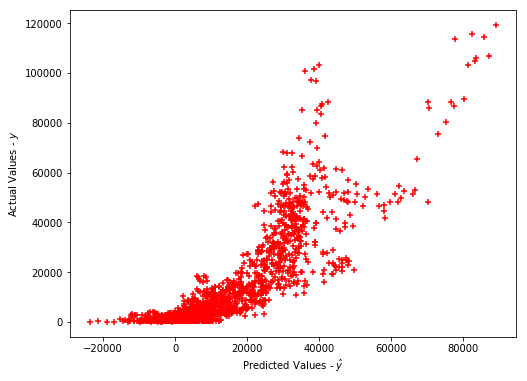

MSE: 93369053.5742


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     GDP per capita (current US$) [NY.GDP.PCAP.CD]   R-squared:                       0.733
Model:                                                       OLS   Adj. R-squared:                  0.728
Method:                                            Least Squares   F-statistic:                     154.3
Date:                                           Sat, 08 Sep 2018   Prob (F-statistic):               0.00
Time:                                                   10:46:08   Log-Likelihood:                -18192.
No. Observations:                                           1717   AIC:                         3.645e+04
Df Residuals:                                               1686   BIC:                         3.661e+04
Df Model:                                                     30                                         
Covariance Type:                                       nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Population, total [SP.POP.TOTL]                                               -1.596e-06    2.4e-06     -0.666      0.506   -6.29e-06     3.1e-06
Population growth (annual %) [SP.POP.GROW]                                      470.2231    330.198      1.424      0.155    -177.418    1117.864
Surface area (sq. km) [AG.SRF.TOTL.K2]                                           -0.0018      0.000     -4.842      0.000      -0.002      -0.001
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                        453.8347     57.889      7.840      0.000     340.292     567.377
Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]                       387.4982    572.272      0.677      0.498    -734.941    1509.937
Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]    -107.0329     12.191     -8.780      0.000    -130.944     -83.122
Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]                    40.5936     20.049      2.025      0.043       1.270      79.917
Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]          -249.2510     27.299     -9.131      0.000    -302.794    -195.708
Forest area (sq. km) [AG.LND.FRST.K2]                                             0.0022      0.001      2.830      0.005       0.001       0.004
CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]                        1197.0534     90.925     13.165      0.000    1018.716    1375.391
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                      -103.4236     69.636     -1.485      0.138    -240.005      33.158
Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]                            7.4336     33.958      0.219      0.827     -59.171      74.038
Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]     -56.1462     45.437     -1.236      0.217    -145.265      32.972
Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]     -308.1666     41.310     -7.460      0.000    -389.191    -227.142
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                       352.3959     24.558     14.349      0.000     304.228     400.563
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                      -156.2903     23.561     -6.633      0.000    -202.503    -110.078
Gross capita

In [55]:
regression(y,
           X)

In [ ]:
x = filtered['Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]']
plt.scatter(x, y, alpha=0.5)
plt.show()

In [29]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
y

In [31]:
X.head()

,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],Surface area (sq. km) [AG.SRF.TOTL.K2],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]","Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Forest area (sq. km) [AG.LND.FRST.K2],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],Merchandise trade (% of GDP) [TG.VAL.TOTL.GD.ZS],Net barter terms of trade index (2000 = 100) [TT.PRI.MRCH.XD.WD],"Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS],"Preprimary education, duration (years) [SE.PRE.DURS]","Primary education, duration (years) [SE.PRM.DURS]","Secondary education, duration (years) [SE.SEC.DURS]"
1,3089027.0,-0.637357,28750.0,73.955,2.157,19.0372,26.0,95.0,7693.0,6.666620,3.981288,23.498642,14.818675,17.867084,38.053345,0.954237,37.112161,100.0,1.430000e+08,0.919240,2.89406813624137,3,4,8
2,31183660.0,1.349663,2381740.0,70.292,2.514,11.7556,39.7,80.0,15790.0,3.819678,22.654767,8.395059,54.371478,42.069718,20.788626,0.275785,56.948093,100.0,2.801000e+08,12.902006,4.4671956,2,6,6
5,16440924.0,3.032943,1246700.0,47.113,6.639,196.6992,207.0,36.0,597280.0,3.054624,418.018992,5.664690,72.122955,89.685831,62.861278,0.156962,120.060093,100.0,8.786200e+08,59.685139,2.99,3,4,7
6,83584.0,2.119597,440.0,73.541,2.316,65.1598,14.9,95.0,100.0,6.691742,1.552079,1.589540,13.827114,56.237667,60.044123,26.320827,55.290628,100.0,4.311593e+07,0.000000,3.43,2,7,5
7,37057452.0,1.110875,2780400.0,73.832,2.561,66.8976,19.4,91.0,318600.0,-0.788999,1.037287,4.679917,25.990948,10.986396,11.636106,17.507815,18.119043,100.0,1.041831e+10,1.794962,4.6,3,6,6


In [56]:
df['Secondary education, duration (years) [SE.SEC.DURS]']

0         6
1         8
2         6
3       NaN
4         6
5         7
6         5
7         6
8         7
9         5
10        6
11        8
12        7
13        6
14        6
15        7
16        5
17        7
18        6
19        6
20        7
21        7
22        6
23        6
24        8
25        5
26        7
27        5
28        7
29        7
       ... 
3901    NaN
3902      8
3903      6
3904      5
3905      6
3906    NaN
3907    NaN
3908    NaN
3909    NaN
3910    NaN
3911    NaN
3912    NaN
3913    NaN
3914    NaN
3915    NaN
3916    NaN
3917    NaN
3918    NaN
3919    NaN
3920    NaN
3921    NaN
3922    NaN
3923    NaN
3924    NaN
3925    NaN
3926    NaN
3927    NaN
3928    NaN
3929    NaN
3930    NaN
Name: Secondary education, duration (years) [SE.SEC.DURS], Length: 3931, dtype: object